NX31 - DataProject

"Intorduction"

"pakker importeret"

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydst

"What data we have chosen"

In [2]:
dst = pydst.Dst(lang='en')

FTEG_variables = dst.get_variables(table_id = 'OBESK2')
FTEG_variables

,elimination,id,text,time,values
0,True,SEKTOR,sector,False,"[{'id': '1032', 'text': 'General government'},..."
1,False,Tid,time,True,"[{'id': '2008K1', 'text': '2008Q1'}, {'id': '2..."


"Dictornaries"

In [3]:
columns_dict = {}
columns_dict['SEKTOR'] = 'Sector'
columns_dict['TID'] = 'Quarter'
columns_dict['INDHOLD'] = 'FTE'

var_dict = {}
var_dict['Central government'] = 'Central'
var_dict['Regional government'] = 'Regional'
var_dict['Municipal government'] = 'Municipal'
var_dict['Social security funds'] = 'Social security funds'
var_dict['General government'] = 'Total'

"import data"

In [4]:
FTEG_raw = dst.get_data(table_id = 'OBESK2', variables = {'SEKTOR':['*'], 'Tid':['*']})
FTEG_raw

,SEKTOR,TID,INDHOLD
0,Central government,2008Q1,164276
1,Regional government,2008Q1,111410
2,Municipal government,2008Q1,431690
3,Social security funds,2008Q1,1921
4,General government,2008Q1,709297
5,Central government,2008Q2,167654
6,Regional government,2008Q2,107305
7,Municipal government,2008Q2,438649
8,Social security funds,2008Q2,1913
9,General government,2008Q2,715521


"renamer and raplace

In [5]:
FTEG_raw.rename(columns = columns_dict, inplace = True)

for key, value in var_dict.items():
    FTEG_raw.Sector.replace(key, value, inplace = True)

FTEG_raw

,Sector,Quarter,FTE
0,Central,2008Q1,164276
1,Regional,2008Q1,111410
2,Municipal,2008Q1,431690
3,Social security funds,2008Q1,1921
4,Total,2008Q1,709297
5,Central,2008Q2,167654
6,Regional,2008Q2,107305
7,Municipal,2008Q2,438649
8,Social security funds,2008Q2,1913
9,Total,2008Q2,715521


"transponere and copies"

In [6]:
FTEG = FTEG_raw.copy().pivot(index = 'Quarter', columns = 'Sector', values = 'FTE')
FTEG

Sector,Central,Municipal,Regional,Social security funds,Total
Quarter,,,,,
2008Q1,164276,431690,111410,1921,709297
2008Q2,167654,438649,107305,1913,715521
2008Q3,166319,433840,111262,1849,713270
2008Q4,170749,441479,114385,1843,728455
2009Q1,169315,442231,114244,1843,727633
2009Q2,172790,449778,116310,1873,740750
2009Q3,170775,445803,115956,1889,734423
2009Q4,173914,450609,118369,1896,744787
2010Q1,172563,450873,117452,1860,742748


"Descirbetive statistics"

In [7]:
FTEG_raw.groupby(['Sector']).describe()

FTE                                                    \
                      count           mean           std       min        25%   
Sector                                                                          
Central                44.0  173199.977273   2665.832350  164276.0  172505.00   
Municipal              44.0  430653.113636  12017.772657  413069.0  420759.25   
Regional               44.0  118347.772727   3491.849366  107305.0  116019.00   
Social security funds  44.0    1940.386364     96.370462    1843.0    1876.00   
Total                  44.0  724141.159091  10917.445550  706772.0  716269.75   

                                                      
                            50%        75%       max  
Sector                                                
Central                173527.5  174949.50  177641.0  
Municipal              428491.5  439356.50  457033.0  
Regional               119047.0  121126.25  122494.0  
Social security funds    1902.0    1987.75    2147.0  
Total                  722094.5  728439.25  751954.0

"simple plot of all avalible data"

Text(0.5, 1.0, 'Public full-time employed')

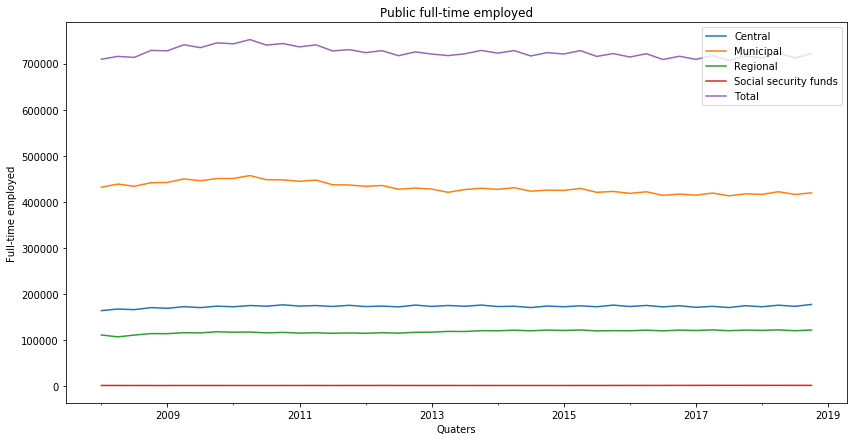

In [11]:
fig, ax = plt.subplots(figsize=(14,7))
FTEG_raw['Quarter'] = pd.to_datetime(FTEG_raw['Quarter'])
FTEG_raw.set_index('Quarter').groupby('Sector')['FTE'].plot(x="Quarter", legend=True, ax=ax);
ax.set_ylabel("Full-time employed")
ax.set_xlabel('Quaters')
ax.set_title("Public full-time employed")

"Relative size"

In [14]:
rc_central = FTEG['Central']/FTEG['Total']*100
rc_municipal = FTEG['Municipal']/FTEG['Total']*100
rc_regional = FTEG['Regional']/FTEG['Total']*100
rc_social = FTEG['Social security funds']/FTEG['Total']*100

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Share of total public employment')

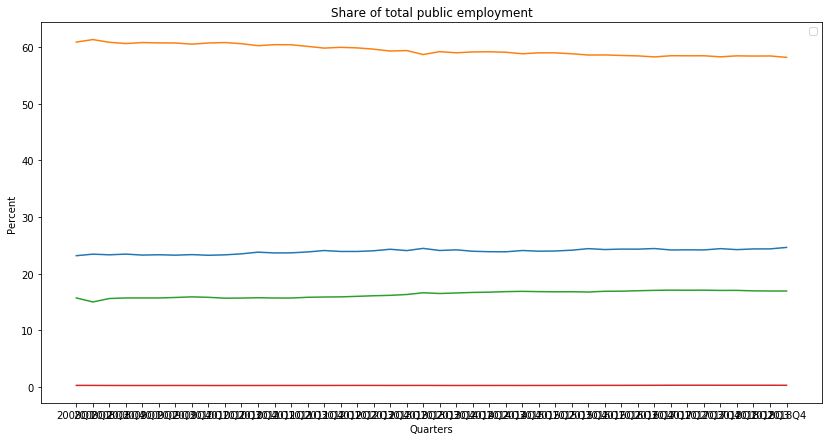

In [16]:
fig2 = plt.figure(figsize=(14,7))
ax = plt.subplot(1,1,1)
ax.plot(rc_central)
ax.plot(rc_municipal)
ax.plot(rc_regional)
ax.plot(rc_social) 
ax.set_xlabel("Quarters")
ax.set_ylabel("Percent")
ax.legend()
ax.set_title("Share of total public employment")

In [ ]:
FTEG_raw["Quarter"].str.split("Q")

In [ ]:
pd.Timestamp(year=2018, month=3, day=1)